In [3]:
mongoimport --type csv -d DB_wildfire -c california_list --headerline --drop California_Fire_Incidents.csv

SyntaxError: invalid syntax (1788657794.py, line 1)

In [46]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
mongo = MongoClient(port=27017)

In [48]:
# assign the uk_food database to a variable name
db = mongo['DB_wildfire']

In [49]:
collections = db.list_collection_names()
collections

['california_list']

In [50]:
# assign the collection to a variable
california_l = db['california_list']

In [51]:
data = list(california_l.find())

In [52]:
df = pd.DataFrame(data)

In [53]:
# Delete the "_id" column of the data frame
if "_id" in df.columns:
    df.drop(columns=["_id"], inplace=True)

In [54]:
# Print the data frame
print(df.head())

  AcresBurned Active                                          AdminUnit  \
0      257314  False  Stanislaus National Forest/Yosemite National Park   
1       24251  False                       Ventura County Fire/CAL FIRE   
2       22992  False                             Sierra National Forest   
3       27440  False                              Tahoe National Forest   
4       27531  False  CAL FIRE Riverside Unit / San Bernardino Natio...   

  AirTankers  ArchiveYear CalFireIncident  \
0                    2013            True   
1                    2013            True   
2                    2013           False   
3                    2013           False   
4                    2013            True   

                          CanonicalUrl  \
0       /incidents/2013/8/17/rim-fire/   
1    /incidents/2013/5/2/springs-fire/   
2     /incidents/2013/7/22/aspen-fire/   
3  /incidents/2013/8/10/american-fire/   
4  /incidents/2013/7/15/mountain-fire/   

                         

In [55]:
# Select the first 5 rows of the data frame
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314,False,Stanislaus National Forest/Yosemite National Park,,2013,True,/incidents/2013/8/17/rim-fire/,,,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,,,,,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,
1,24251,False,Ventura County Fire/CAL FIRE,,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6,10,,,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11
2,22992,False,Sierra National Forest,,2013,False,/incidents/2013/7/22/aspen-fire/,,,Fresno,...,"217 Aspen Fire, July 2013, Big Creek, Fresno ...",2013-07-22T22:15:00Z,Finalized,,,,,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,
3,27440,False,Tahoe National Forest,,2013,False,/incidents/2013/8/10/american-fire/,,,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,,,,,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,
4,27531,False,CAL FIRE Riverside Unit / San Bernardino Natio...,,2013,True,/incidents/2013/7/15/mountain-fire/,,,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,,,,,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,


In [56]:
# How many columns have null values
print(df.isnull().sum())

AcresBurned             0
Active                  0
AdminUnit               0
AirTankers              0
ArchiveYear             0
CalFireIncident         0
CanonicalUrl            0
ConditionStatement      0
ControlStatement        0
Counties                0
CountyIds               0
CrewsInvolved           0
Dozers                  0
Engines                 0
Extinguished            0
Fatalities              0
Featured                0
Final                   0
FuelType                0
Helicopters             0
Injuries                0
Latitude                0
Location                0
Longitude               0
MajorIncident           0
Name                    0
PercentContained        0
PersonnelInvolved       0
Public                  0
SearchDescription       0
SearchKeywords          0
Started                 0
Status                  0
StructuresDamaged       0
StructuresDestroyed     0
StructuresEvacuated     0
StructuresThreatened    0
UniqueId                0
Updated     

In [57]:
# Reduce the data frame by extracting "Acress Burned", "Archive Year", 
# "Latitude", "Longitude", "Counties", "CountyIds"
reduced_df = df.loc[:, ["AcresBurned", "ArchiveYear", "Counties",
                       "CountyIds", "Latitude", "Longitude"]]
reduced_df.head(10)

,AcresBurned,ArchiveYear,Counties,CountyIds,Latitude,Longitude
0,257314,2013,Tuolumne,55,37.857000,-120.086000
1,24251,2013,Ventura,56,0.000000,0.000000
2,22992,2013,Fresno,10,37.279000,-119.318000
3,27440,2013,Placer,31,39.120000,-120.650000
4,27531,2013,Riverside,33,33.709500,-116.728850
5,30274,2013,Los Angeles,19,34.585595,-118.423176
6,11429,2013,Tehama,52,40.042630,-121.853970
7,14754,2013,Siskiyou,47,41.320000,-123.176000
8,8073,2013,Shasta,45,40.498332,-122.535496
9,20292,2013,Riverside,33,33.861570,-116.904270


In [58]:
reduced_df = reduced_df[["ArchiveYear", "Counties", "CountyIds", "AcresBurned",
                        "Latitude", "Longitude"]]
reduced_df.head()

,ArchiveYear,Counties,CountyIds,AcresBurned,Latitude,Longitude
0,2013,Tuolumne,55,257314,37.8570,-120.08600
1,2013,Ventura,56,24251,0.0000,0.00000
2,2013,Fresno,10,22992,37.2790,-119.31800
3,2013,Placer,31,27440,39.1200,-120.65000
4,2013,Riverside,33,27531,33.7095,-116.72885


In [59]:
# Visualize the data type of each column
reduced_df.dtypes

ArchiveYear      int64
Counties        object
CountyIds       object
AcresBurned     object
Latitude       float64
Longitude      float64
dtype: object

In [60]:
# Turn the data type from "AcresBurned" column to float
reduced_df["AcresBurned"] = pd.to_numeric(reduced_df["AcresBurned"], errors = "coerce")


In [61]:
reduced_df.dtypes

ArchiveYear      int64
Counties        object
CountyIds       object
AcresBurned    float64
Latitude       float64
Longitude      float64
dtype: object

/var/folders/jd/3mx9b7nj5hg_077gv13p6zt00000gn/T/ipykernel_22832/3745075485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_counties_acres.values, y=top_counties_acres.index, palette="Blues_r")


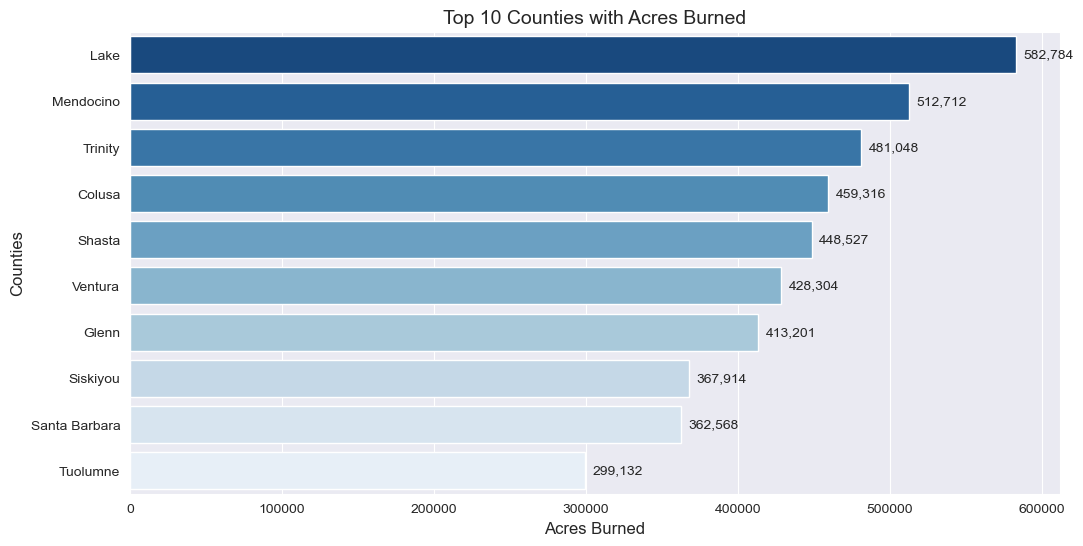

In [78]:
acres_per_county = reduced_df.groupby("Counties")["AcresBurned"].sum().sort_values(ascending=False)
top_counties_acres = acres_per_county.head(10)
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_counties_acres.values, y=top_counties_acres.index, palette="Blues_r")
plt.xlabel("Acres Burned", fontsize=12)
plt.ylabel("Counties", fontsize=12)
plt.title("Top 10 Counties with Acres Burned", fontsize=14)

# Agregar valores encima de las barras
for i, v in enumerate(top_counties_acres.values):
    ax.text(v + 5000, i, f"{int(v):,}", va="center", fontsize=10)  # Ajusta según el rango de datos

# Guardar y mostrar
plt.savefig("Top_Counties_with_Acres_Burned_Seaborn.png", bbox_inches="tight")
plt.show()

/var/folders/jd/3mx9b7nj5hg_077gv13p6zt00000gn/T/ipykernel_22832/1041430043.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


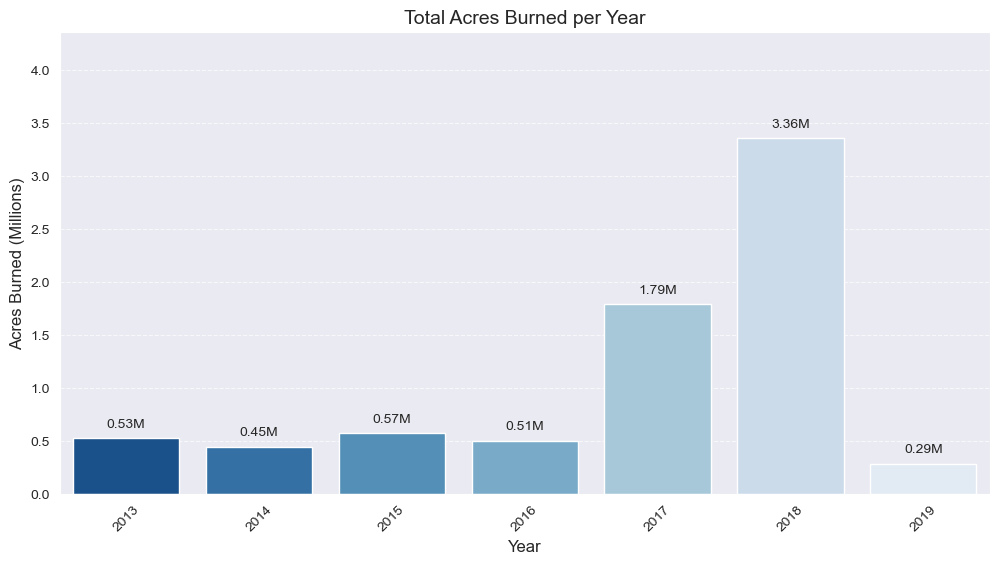

In [79]:
acres_burned_per_year = reduced_df.groupby("ArchiveYear")["AcresBurned"].sum()
acres_burned_per_year_million = acres_burned_per_year / 1000000

sns.set_style("darkgrid")
plt.figure(figsize=(12,6))

ax = sns.barplot(
    x = acres_burned_per_year_million.index,
    y = acres_burned_per_year_million.values,
    palette = "Blues_r"
)

plt.xlabel("Year", fontsize = 12)
plt.ylabel("Acres Burned (Millions)", fontsize = 12)
plt.title("Total Acres Burned per Year", fontsize = 14)

for i, value in enumerate(acres_burned_per_year_million):
    ax.text(i, value + 0.1, f'{value:,.2f}M', ha='center', fontsize=10)

plt.ylim(0, acres_burned_per_year_million.max() + 1)
plt.xticks(rotation= 45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("Total_Acres_Burned_per_Year_Seaborn.png", bbox_inches="tight")
plt.show()

Enter the start year (2013-2019):  2015
Enter the end year (2013-2019):  2018


/var/folders/jd/3mx9b7nj5hg_077gv13p6zt00000gn/T/ipykernel_22832/3805737317.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


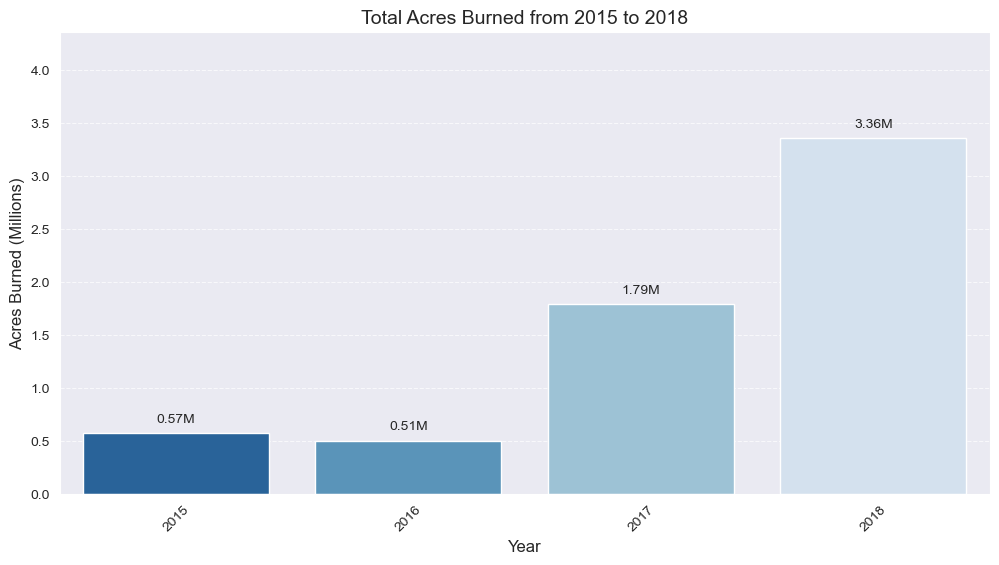

In [80]:
# Interactive plot
# Define the valid year range 
MIN_YEAR, MAX_YEAR = 2013,2019

# Get user input for year range with validation
while True:
    try:
        start_year = int(input(f"Enter the start year ({MIN_YEAR}-{MAX_YEAR}): "))
        end_year = int(input(f"Enter the end year ({MIN_YEAR}-{MAX_YEAR}): "))
        
        if start_year < MIN_YEAR or end_year > MAX_YEAR or start_year > end_year:
            print(f"Please enter a valid range between {MIN_YEAR} and {MAX_YEAR}.")
        else:
            break
    except ValueError:
        print("Invalid input. Please enter a valid year.")

# Group by year and sum acres burned
acres_burned_per_year = reduced_df.groupby("ArchiveYear")["AcresBurned"].sum()

# Convert to millions
acres_burned_per_year_million = acres_burned_per_year / 1000000

# Filter data based on the selected year range
filtered_data = acres_burned_per_year_million.loc[start_year:end_year]

# Set Seaborn style
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Creat bar plot
ax = sns.barplot(
    x = filtered_data.index,
    y = filtered_data.values,
    palette = "Blues_r"
)

# Labels and title

plt.xlabel("Year", fontsize=12)
plt.ylabel("Acres Burned (Millions)", fontsize=12)
plt.title(f"Total Acres Burned from {start_year} to {end_year}", fontsize=14)

# Add value labels on bars
for i, value in enumerate(filtered_data):
    ax.text(i, value + 0.1, f'{value:,.2f}M', ha='center', fontsize=10)

# Adjust axes and grid
plt.ylim(0, filtered_data.max() + 1)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and show plot
plt.savefig(f"Total_Acres_Burned_{start_year}_{end_year}.png", bbox_inches="tight")
plt.show()


Choose how many counties to visualize (max 59):  25


/var/folders/jd/3mx9b7nj5hg_077gv13p6zt00000gn/T/ipykernel_22832/1290847954.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


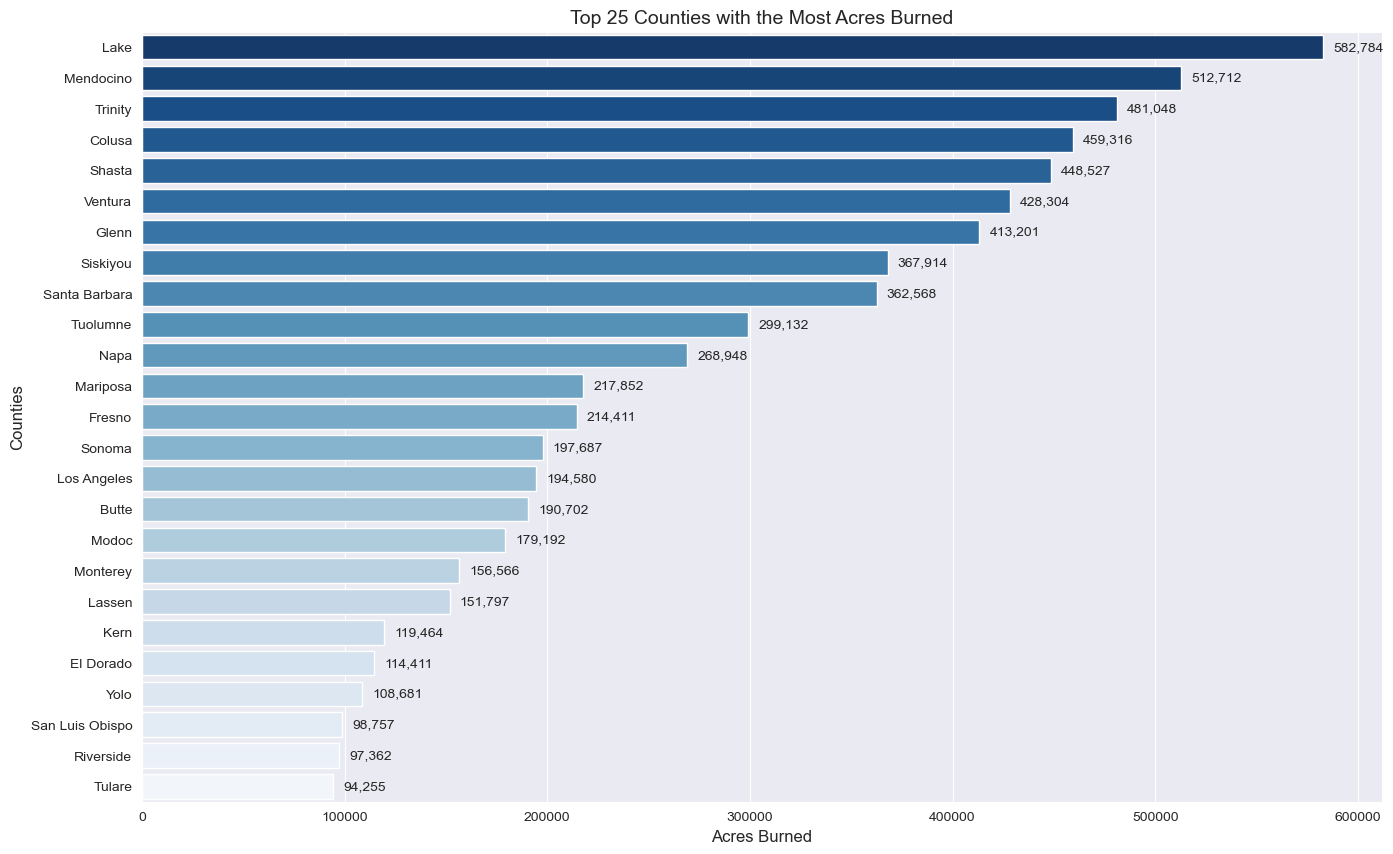

In [81]:
# Interactive plot
# Get the total number of unique counties
max_counties = reduced_df["Counties"].nunique()

# Validate the user input
while True:
    try:
        user_d = int(input(f"Choose how many counties to visualize (max {max_counties}): "))
        if 1 <= user_d <= max_counties:
            break
        else:
            print(f"Please enter a number between 1 and {max_counties}.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Group by counties and sum the acres burned
acres_per_county = reduced_df.groupby("Counties")["AcresBurned"].sum().sort_values(ascending=False)

# Select the top counties based on user input
top_counties_acres = acres_per_county.head(user_d)

# Set Seaborn style
sns.set_style("darkgrid")

# Create the figure with increased size
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    x=top_counties_acres.values,
    y=top_counties_acres.index,
    palette="Blues_r"
)

# Labels and title
plt.xlabel("Acres Burned", fontsize=12)
plt.ylabel("Counties", fontsize=12)
plt.title(f"Top {user_d} Counties with the Most Acres Burned", fontsize=14)

# Add value label on the bars
for i, value in enumerate(top_counties_acres.values):
    ax.text(value + 5000, i, f"{int(value):,}", va="center", fontsize=10)

# Save and display the plot
plt.savefig(f"Top_{user_d}_Counties_with_Acres_Burned_Seaborn.png", bbox_inches="tight")
plt.show()
